# Contents
### Importing
### Prep For Algorithms
### Train and Test Split
### Run Decision Tree Classifier
### Confusion Matrix

# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure
from sklearn.multioutput import MultiOutputClassifier

In [2]:
path = r'C:\Users\rubix\Downloads\Machine Learning 1\02 Data'

In [3]:
df_weather_scaled = pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_scaled.csv'), index_col = False)

In [4]:
df_pleasant = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

## Data Checks

In [5]:
df_weather_scaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [6]:
df_pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Prep For Algorithms

## Filter Weather Data

In [7]:
# A list of all the strings you want to search for
search_terms = ['GDANSK', 'ROMA', 'TOURS']

# Join the list of terms into a single string for the regex pattern
pattern = '|'.join(search_terms)

# Drop all columns containing any of the terms
df_weather_filtered = df_weather_scaled.drop(df_weather_scaled.filter(regex=pattern).columns, axis=1)

In [8]:
df_weather_filtered.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


# Train and Test Split

In [9]:
#Create an 'X' and y df by dropping the unneeded columns.
X = df_weather_filtered.drop(['DATE', 'MONTH'], axis=1)
y = df_pleasant.drop(['DATE'],axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=64)

In [11]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


## Are Datasets the Correct Type (NumPy Array)?

### Define types

In [12]:
def get_data_type(data):
    """Returns a string indicating if the object is a DataFrame, array, or other type."""
    if isinstance(data, pd.DataFrame):
        return "This is a pandas DataFrame."
    elif isinstance(data, np.ndarray):
        return "This is a numpy array."
    else:
        return "This is another type of object."

In [13]:
print(get_data_type(X_train))
print(get_data_type(X_test))
print(get_data_type(y_train))
print(get_data_type(y_test))

This is a pandas DataFrame.
This is a pandas DataFrame.
This is a pandas DataFrame.
This is a pandas DataFrame.


### Answer

Nope. Those need to be changed.

## Converting DataFrame to NumPy Array

In [14]:
X_test = np.array(X_test)
X_train = np.array(X_train)

### Check

In [15]:
print(get_data_type(X_train))
print(get_data_type(X_test))
print(get_data_type(y_train))
print(get_data_type(y_test))

This is a numpy array.
This is a numpy array.
This is a pandas DataFrame.
This is a pandas DataFrame.


# Run Decision Tree Classifier

[Text(0.36849780344574945, 0.9833333333333333, 'x[49] <= 0.403\ngini = 0.313\nsamples = 17212\nvalue = [[13033.0, 4179.0]\n[11210.0, 6002.0]\n[11644.0, 5568.0]\n[13930.0, 3282.0]\n[13572.0, 3640.0]\n[13505.0, 3707.0]\n[14447.0, 2765.0]\n[12440.0, 4772.0]\n[13692.0, 3520.0]\n[9560.0, 7652.0]\n[13663.0, 3549.0]\n[14553.0, 2659.0]\n[17212.0, 0.0]\n[14340.0, 2872.0]\n[16370.0, 842.0]]'),
 Text(0.06273470718094794, 0.95, 'x[98] <= -0.216\ngini = 0.099\nsamples = 10833\nvalue = [[10185.0, 648.0]\n[9106.0, 1727.0]\n[9547.0, 1286.0]\n[10745.0, 88.0]\n[10833.0, 0.0]\n[10189.0, 644.0]\n[10759.0, 74.0]\n[9874.0, 959.0]\n[10764.0, 69.0]\n[8064.0, 2769.0]\n[10435.0, 398.0]\n[10576.0, 257.0]\n[10833.0, 0.0]\n[10578.0, 255.0]\n[10675.0, 158.0]]'),
 Text(0.2156162553133487, 0.9666666666666666, 'True  '),
 Text(0.0176751606015498, 0.9166666666666666, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7598\nvalue = [[7490, 108]\n[6913, 685]\n[7240, 358]\n[7583, 15]\n[7598, 0]\n[7560, 38]\n[7580, 18]\n[7383, 215]\

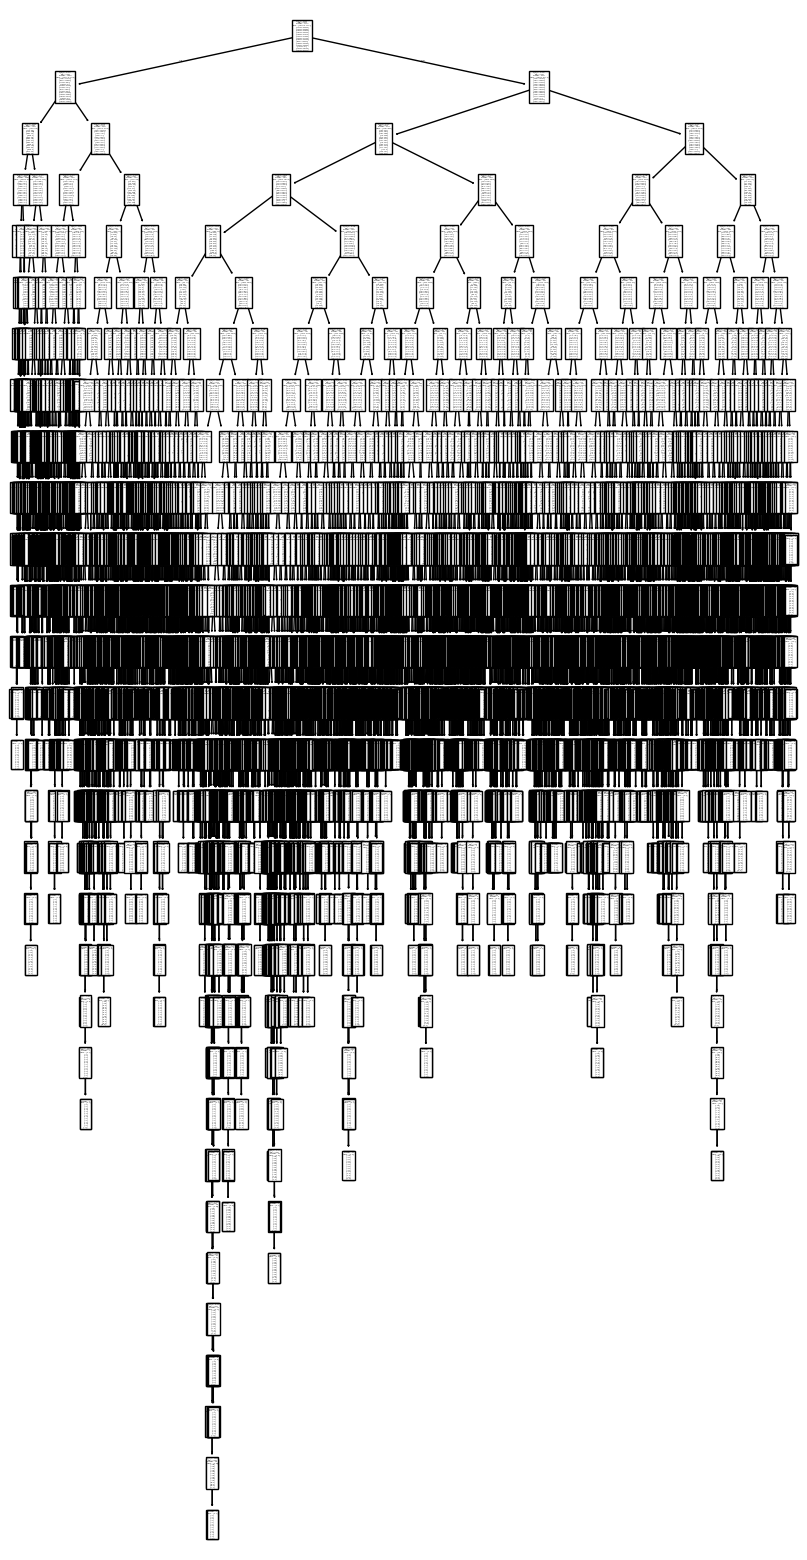

In [16]:
df_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
df_tree.fit(X_train, y_train)
figure(figsize=(10,20))
tree.plot_tree(df_tree)

In [17]:
#cross validation method
y_pred_train = df_tree.predict(X_train)
print('Train accuracy score: ',cross_val_score(df_tree, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6117245917386603


## Accuracy and Tree Pruning

So, my brain is still in a version of "literal mode" and I'm seeing what looks like WAY too many leaves and branches (suggesting the tree is overfit). With an accuracy score of ~61% I'm inclined to think that something is wrong. I think some pruning would be beneficial at some point (pre or post and methods will need to be decided).

In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4179
           1       1.00      1.00      1.00      6002
           2       1.00      1.00      1.00      5568
           3       1.00      1.00      1.00      3282
           4       1.00      1.00      1.00      3640
           5       1.00      1.00      1.00      3707
           6       1.00      1.00      1.00      2765
           7       1.00      1.00      1.00      4772
           8       1.00      1.00      1.00      3520
           9       1.00      1.00      1.00      7652
          10       1.00      1.00      1.00      3549
          11       1.00      1.00      1.00      2659
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2872
          14       1.00      1.00      1.00       842

   micro avg       1.00      1.00      1.00     55009
   macro avg       0.93      0.93      0.93     55009
weighted avg       1.00   

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-package

# Confusion Matrices

## Define locations for Matrices

In [20]:
locations = list({x.split("_")[0] for x in df_weather_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

## Train Data

In [ ]:
y_pred_train

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


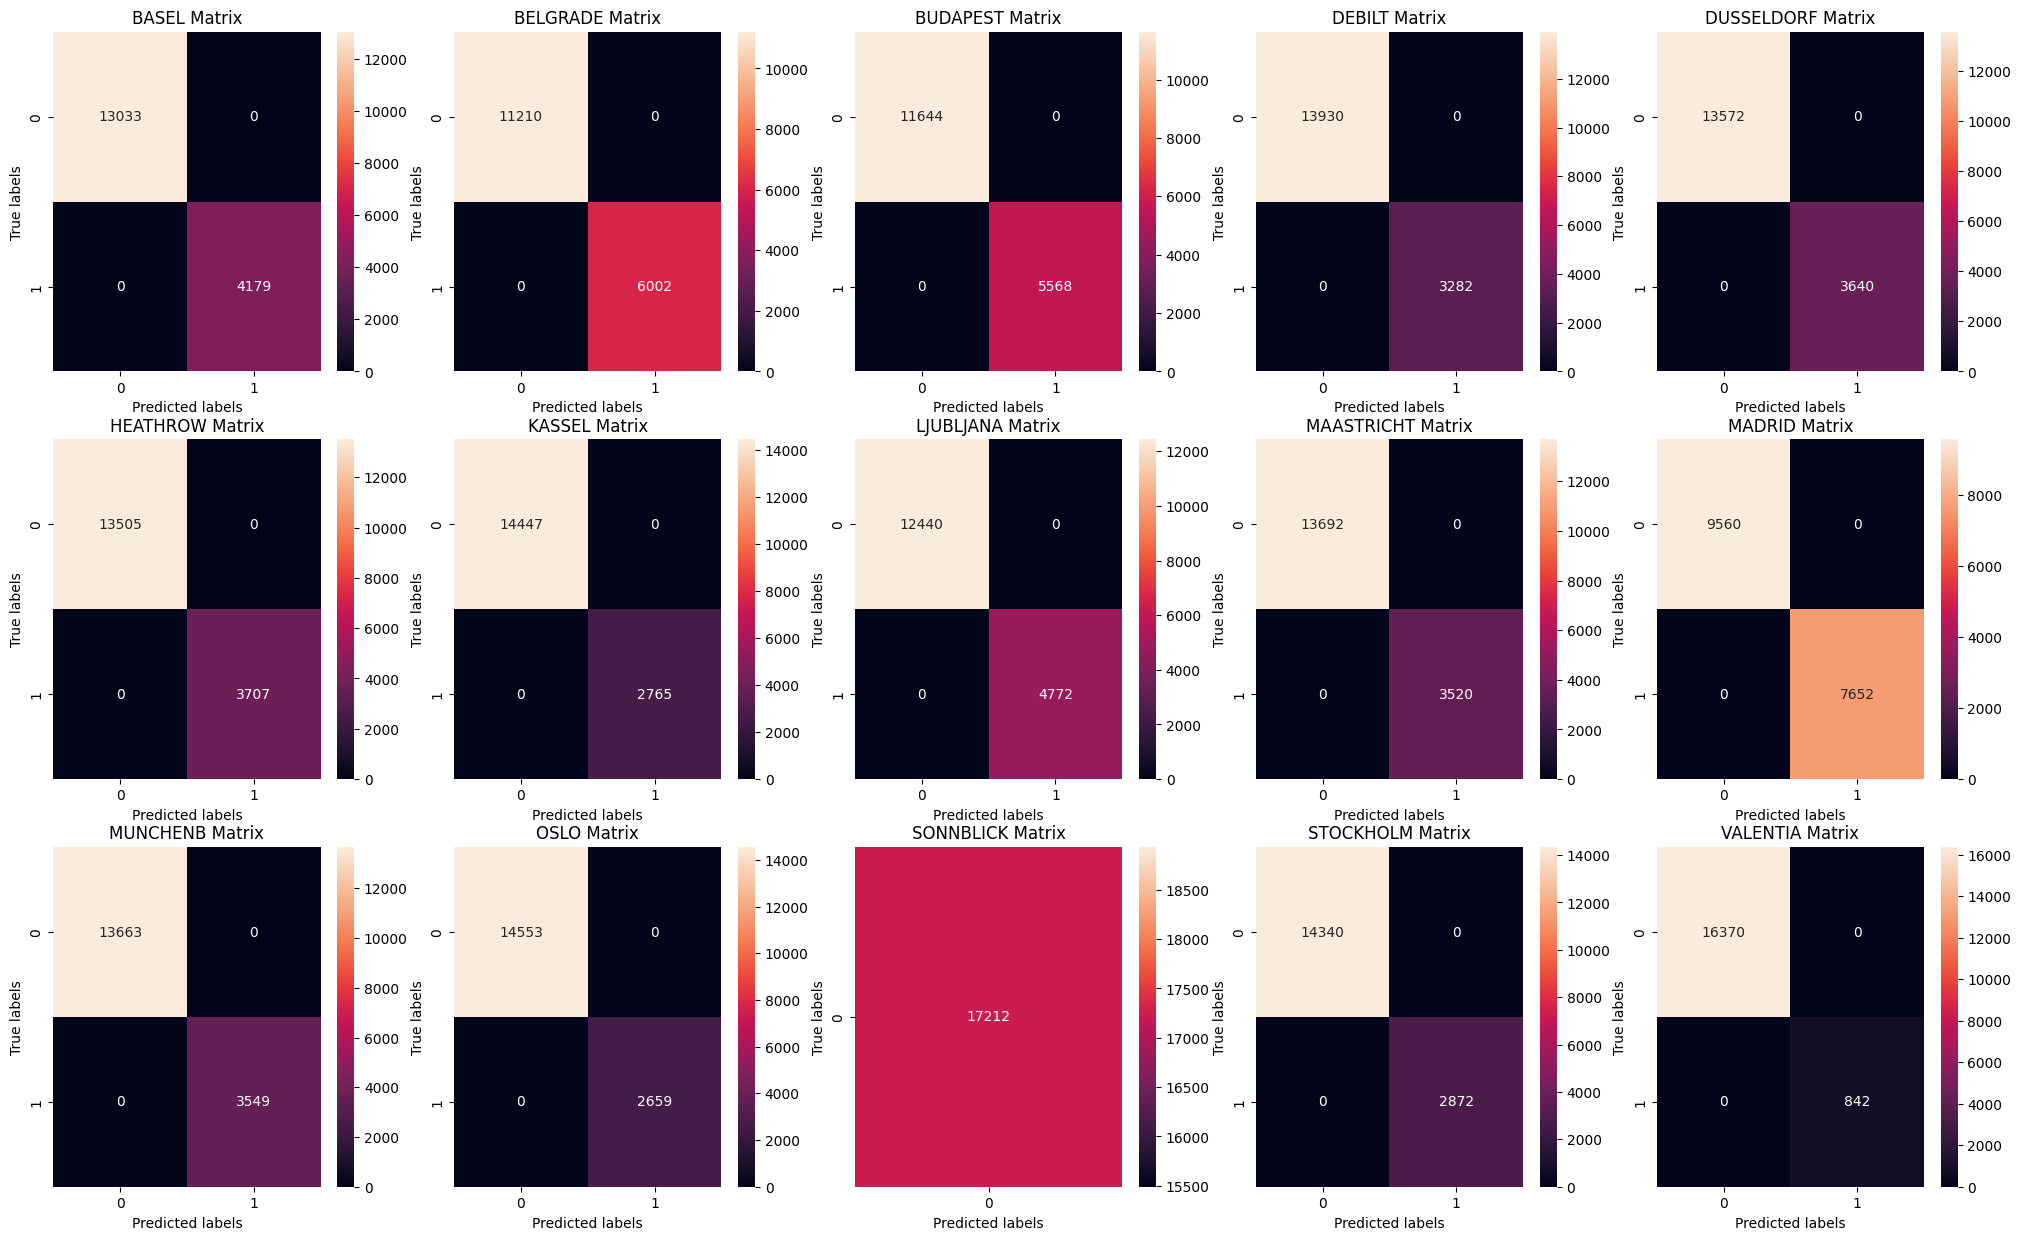

In [21]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [22]:
y_pred = df_tree.predict(X_train)
print('Test accuracy score: ',accuracy_score(y_train, y_pred))
multilabel_confusion_matrix(y_train, y_pred)

Test accuracy score:  1.0


array([[[13033,     0],
        [    0,  4179]],

       [[11210,     0],
        [    0,  6002]],

       [[11644,     0],
        [    0,  5568]],

       [[13930,     0],
        [    0,  3282]],

       [[13572,     0],
        [    0,  3640]],

       [[13505,     0],
        [    0,  3707]],

       [[14447,     0],
        [    0,  2765]],

       [[12440,     0],
        [    0,  4772]],

       [[13692,     0],
        [    0,  3520]],

       [[ 9560,     0],
        [    0,  7652]],

       [[13663,     0],
        [    0,  3549]],

       [[14553,     0],
        [    0,  2659]],

       [[17212,     0],
        [    0,     0]],

       [[14340,     0],
        [    0,  2872]],

       [[16370,     0],
        [    0,   842]]])

## Test Data

In [23]:
y_pred_test = df_tree.predict(X_test)

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


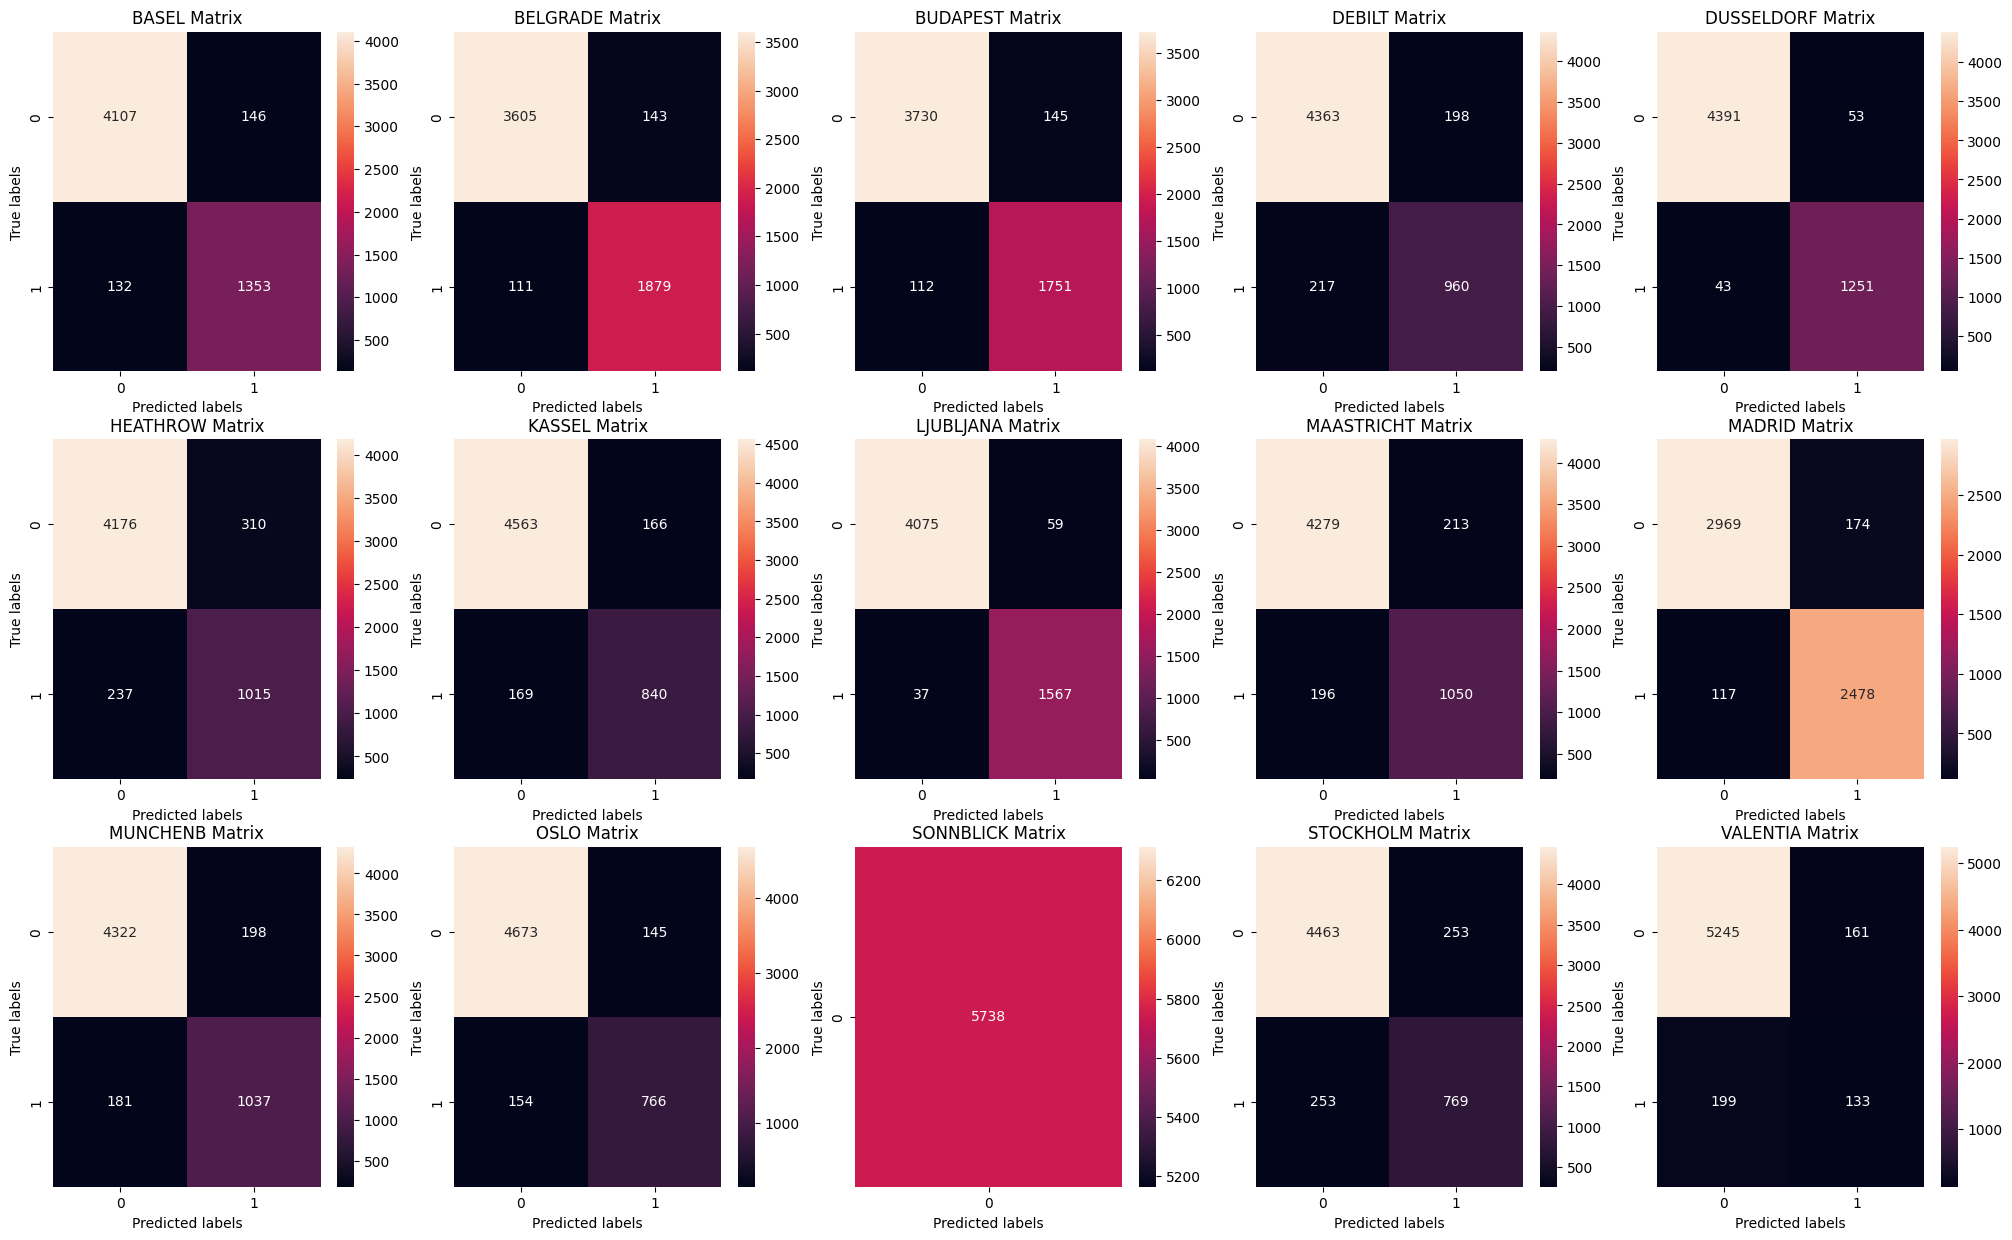

In [24]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [25]:
y_pred = df_tree.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.6275705820843499


array([[[4107,  146],
        [ 132, 1353]],

       [[3605,  143],
        [ 111, 1879]],

       [[3730,  145],
        [ 112, 1751]],

       [[4363,  198],
        [ 217,  960]],

       [[4391,   53],
        [  43, 1251]],

       [[4176,  310],
        [ 237, 1015]],

       [[4563,  166],
        [ 169,  840]],

       [[4075,   59],
        [  37, 1567]],

       [[4279,  213],
        [ 196, 1050]],

       [[2969,  174],
        [ 117, 2478]],

       [[4322,  198],
        [ 181, 1037]],

       [[4673,  145],
        [ 154,  766]],

       [[5738,    0],
        [   0,    0]],

       [[4463,  253],
        [ 253,  769]],

       [[5245,  161],
        [ 199,  133]]])

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1485
           1       0.93      0.94      0.94      1990
           2       0.92      0.94      0.93      1863
           3       0.83      0.82      0.82      1177
           4       0.96      0.97      0.96      1294
           5       0.77      0.81      0.79      1252
           6       0.83      0.83      0.83      1009
           7       0.96      0.98      0.97      1604
           8       0.83      0.84      0.84      1246
           9       0.93      0.95      0.94      2595
          10       0.84      0.85      0.85      1218
          11       0.84      0.83      0.84       920
          12       0.00      0.00      0.00         0
          13       0.75      0.75      0.75      1022
          14       0.45      0.40      0.42       332

   micro avg       0.88      0.89      0.88     19007
   macro avg       0.78      0.79      0.79     19007
we

C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rubix\anaconda3\Lib\site-package